In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

%matplotlib inline
pd.set_option('precision', 2)
sns.set()

column_list = ['mpl_hostname','mpl_letter','mst_metratio','mpl_discmethod','mpl_pnum','mpl_orbper','mpl_orbsmax',
               'mpl_orbeccen','mpl_orbincl','mpl_bmassj','mpl_radj','mpl_dens','mpl_eqt','mpl_insol',
               'mst_teff','mst_mass','mst_rad','mst_age','mst_lum','mpl_status']

core_columns = ['mst_teff','mst_mass','mst_rad','mpl_orbper','mpl_orbsmax',
                                      'mpl_bmassj','mpl_radj','mpl_dens','mpl_eqt']

Read the file containing the last data to be extracted from the archive.

In [2]:
exoplanet_extract = pd.read_pickle('current_exo_ext')

The planets density is a column that is critical in determining the type of planet. So only rows that have a density estimate are used. Initially we only want a smaller number of attributes.

In [3]:
exoplanet_core = exoplanet_extract.loc[exoplanet_extract['mpl_dens'].notnull(),core_columns]


We start by examining the statistics of the data.


In [4]:
exoplanet_core.describe()

,mst_teff,mst_mass,mst_rad,mpl_orbper,mpl_orbsmax,mpl_bmassj,mpl_radj,mpl_dens,mpl_eqt
count,1238.00,1327.00,1284.00,1378.00,1.20e+03,1.36e+03,1380.00,1393.00,780.00
mean,5594.33,1.03,1.17,12.15,7.37e-02,1.27e+00,0.96,2.29,1352.27
std,784.58,0.27,0.52,39.78,1.13e-01,2.31e+00,0.50,4.16,532.18
min,2559.00,0.08,0.04,0.09,4.40e-03,2.10e-04,0.04,0.01,199.00
25%,5252.25,0.89,0.86,2.53,3.61e-02,7.90e-02,0.44,0.44,1001.00
50%,5700.00,1.03,1.08,3.71,4.67e-02,6.60e-01,1.10,0.93,1400.00
75%,6095.00,1.21,1.44,7.34,6.20e-02,1.33e+00,1.30,2.40,1700.50
max,10170.00,2.52,6.30,1047.84,2.03e+00,2.72e+01,2.09,77.70,4050.00


In [5]:
exoplanet_core.skew()

mst_teff       -0.69
mst_mass       -0.30
mst_rad         2.73
mpl_orbper     15.01
mpl_orbsmax     7.57
mpl_bmassj      5.25
mpl_radj       -0.41
mpl_dens        7.49
mpl_eqt         0.04
dtype: float64

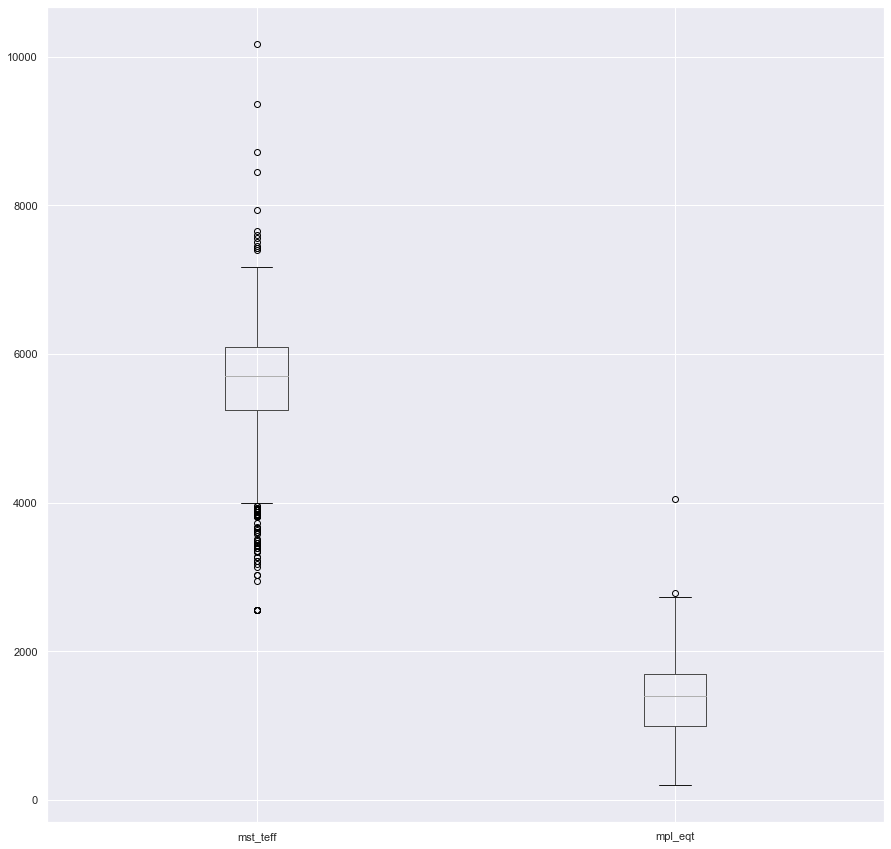

In [6]:
ax = exoplanet_core.boxplot(figsize=(15,15),column=['mst_teff','mpl_eqt'])

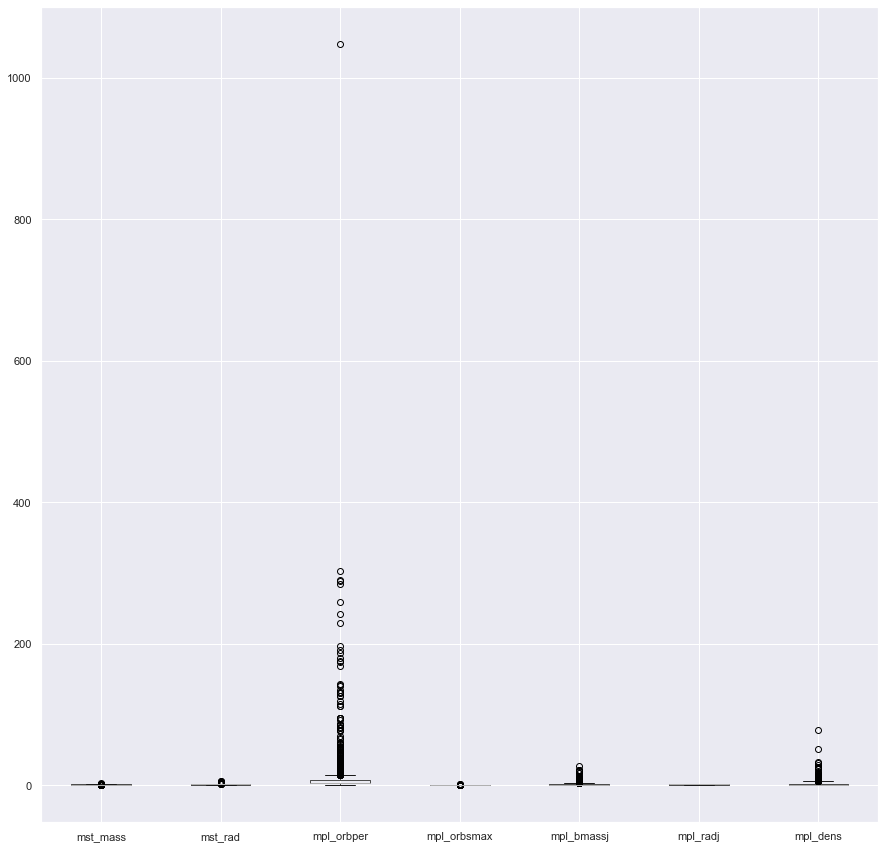

In [7]:
ax = exoplanet_core.boxplot(figsize=(15,15),column=['mst_mass','mst_rad','mpl_orbper','mpl_orbsmax','mpl_bmassj',
                'mpl_radj','mpl_dens'])

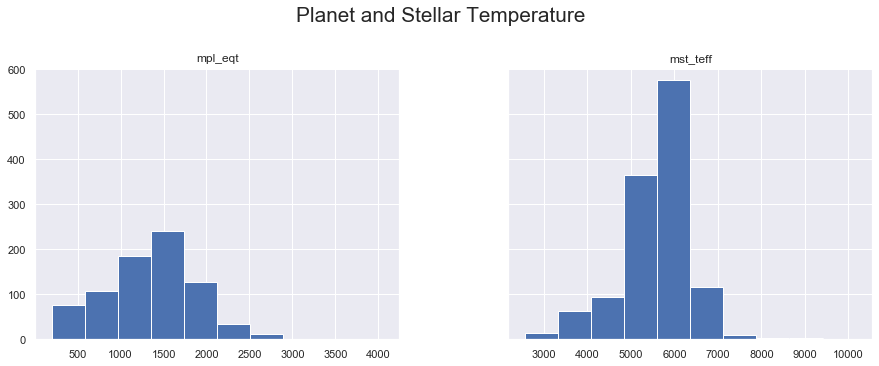

In [8]:
fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2, sharey=True)
exoplanet_core.hist(column=['mst_teff','mpl_eqt'], ax=axes)
blag = plt.suptitle('Planet and Stellar Temperature', x=0.5, y=1.05, ha='center', fontsize='xx-large')


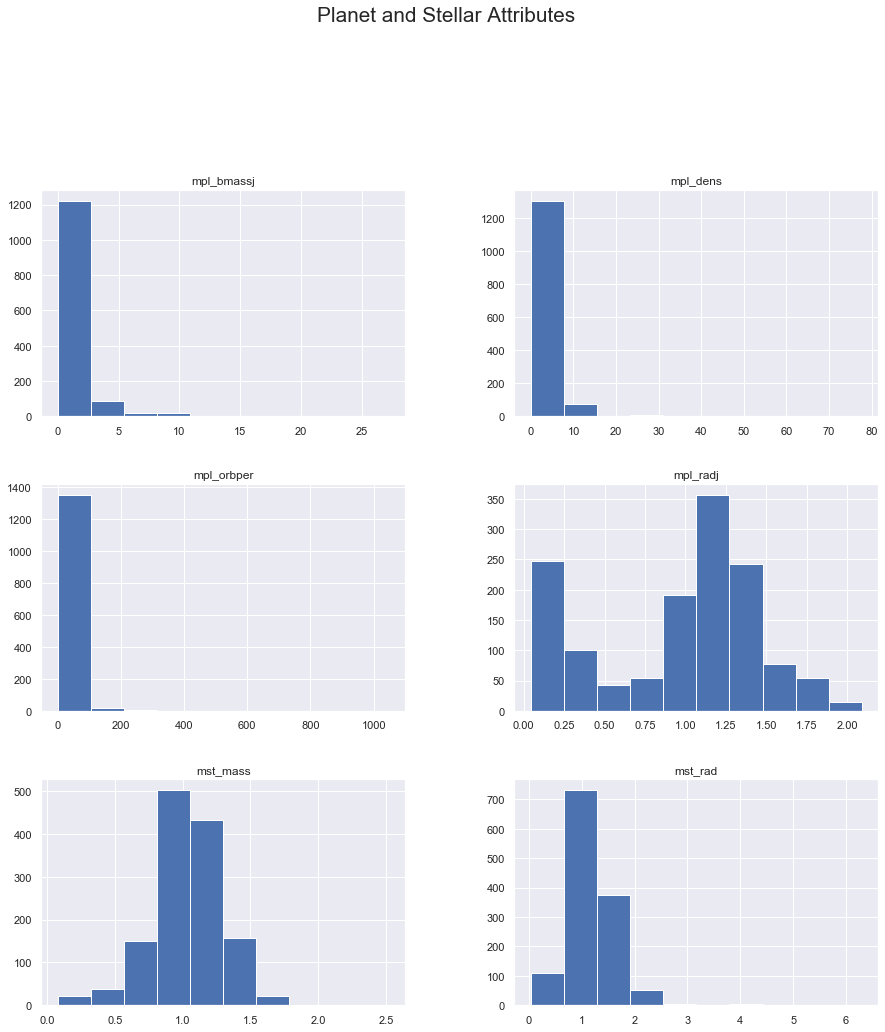

In [9]:
fig, axes = plt.subplots(figsize=(15,15),nrows=3, ncols=2)
exoplanet_core.hist(column=['mst_mass','mst_rad','mpl_orbper','mpl_bmassj',
                'mpl_radj','mpl_dens'], ax=axes)
blah = plt.suptitle('Planet and Stellar Attributes', x=0.5, y=1.05, ha='center', fontsize='xx-large')


In [10]:
exoplanet_core.corr()

,mst_teff,mst_mass,mst_rad,mpl_orbper,mpl_orbsmax,mpl_bmassj,mpl_radj,mpl_dens,mpl_eqt
mst_teff,1.00,0.91,5.73e-01,-0.05,-4.26e-02,0.28,0.58,-0.13,0.71
mst_mass,0.91,1.00,7.76e-01,-0.07,-6.44e-02,0.27,0.61,-0.15,0.73
mst_rad,0.57,0.78,1.00e+00,-0.04,-7.88e-03,0.16,0.45,-0.13,0.62
mpl_orbper,-0.05,-0.07,-3.72e-02,1.00,9.40e-01,-0.06,-0.19,0.01,-0.32
mpl_orbsmax,-0.04,-0.06,-7.88e-03,0.94,1.00e+00,-0.05,-0.26,0.05,-0.45
mpl_bmassj,0.28,0.27,1.58e-01,-0.06,-4.98e-02,1.00,0.27,0.35,0.22
mpl_radj,0.58,0.61,4.50e-01,-0.19,-2.65e-01,0.27,1.00,-0.40,0.68
mpl_dens,-0.13,-0.15,-1.34e-01,0.01,4.76e-02,0.35,-0.40,1.00,-0.22
mpl_eqt,0.71,0.73,6.17e-01,-0.32,-4.49e-01,0.22,0.68,-0.22,1.00


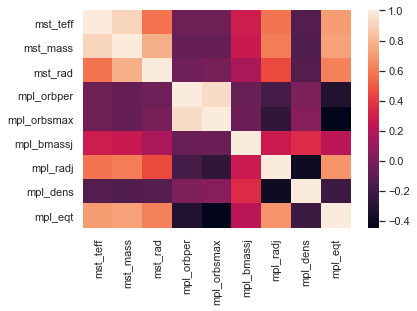

In [11]:
ax = sns.heatmap(exoplanet_core.corr())

In [12]:
exoplanet_core['mst_teff_lg'] = np.log1p(1+exoplanet_core.mst_teff)
exoplanet_core['mst_mass_lg'] = np.log1p(1+exoplanet_core.mst_mass)
exoplanet_core['mst_rad_lg'] = np.log1p(1+exoplanet_core.mst_rad)
exoplanet_core['mpl_orbsmax_lg'] = np.log1p(1+exoplanet_core.mpl_orbsmax)
exoplanet_core['mpl_orbper_lg'] = np.log1p(1+exoplanet_core.mpl_orbper)
exoplanet_core['mpl_bmassj_lg'] = np.log1p(1+exoplanet_core.mpl_bmassj)
exoplanet_core['mpl_radj_lg'] = np.log1p(1+exoplanet_core.mpl_radj)
exoplanet_core['mpl_eqt_lg'] = np.log1p(1+exoplanet_core.mpl_eqt)
exoplanet_core['mpl_dens_lg'] = np.log1p(1+exoplanet_core.mpl_dens)


exoplanet_core = exoplanet_core.drop(core_columns,axis=1)

The data have skews and values that present challenges to clustering algorithms. This include skew, distribution and large difference in scale. We take the natural logarithm of values to reduce the data back to linear relationships.

In [13]:
exoplanet_core.describe()


,mst_teff_lg,mst_mass_lg,mst_rad_lg,mpl_orbsmax_lg,mpl_orbper_lg,mpl_bmassj_lg,mpl_radj_lg,mpl_eqt_lg,mpl_dens_lg
count,1238.00,1327.00,1284.00,1198.00,1378.00,1361.00,1380.00,780.00,1393.00
mean,8.62,1.11,1.14,0.73,2.01,1.07,1.07,7.11,1.27
std,0.16,0.09,0.15,0.05,0.85,0.41,0.18,0.50,0.53
min,7.85,0.73,0.71,0.70,0.74,0.69,0.72,5.30,0.70
25%,8.57,1.06,1.05,0.71,1.51,0.73,0.89,6.91,0.89
50%,8.65,1.11,1.12,0.72,1.74,0.98,1.13,7.25,1.08
75%,8.72,1.17,1.24,0.72,2.23,1.20,1.19,7.44,1.48
max,9.23,1.51,2.12,1.39,6.96,3.38,1.41,8.31,4.38


In [14]:
exoplanet_core.skew()

mst_teff_lg      -1.61
mst_mass_lg      -0.79
mst_rad_lg        0.98
mpl_orbsmax_lg    5.84
mpl_orbper_lg     1.87
mpl_bmassj_lg     1.97
mpl_radj_lg      -0.62
mpl_eqt_lg       -1.31
mpl_dens_lg       1.63
dtype: float64

In [15]:
exoplanet_core.corr()

,mst_teff_lg,mst_mass_lg,mst_rad_lg,mpl_orbsmax_lg,mpl_orbper_lg,mpl_bmassj_lg,mpl_radj_lg,mpl_eqt_lg,mpl_dens_lg
mst_teff_lg,1.00,0.92,0.68,-0.04,-0.12,0.35,0.57,0.71,-0.26
mst_mass_lg,0.92,1.00,0.85,-0.06,-0.12,0.36,0.59,0.72,-0.29
mst_rad_lg,0.68,0.85,1.00,-0.01,-0.04,0.26,0.49,0.65,-0.26
mpl_orbsmax_lg,-0.04,-0.06,-0.01,1.00,0.90,-0.12,-0.28,-0.60,0.07
mpl_orbper_lg,-0.12,-0.12,-0.04,0.90,1.00,-0.23,-0.40,-0.76,0.07
mpl_bmassj_lg,0.35,0.36,0.26,-0.12,-0.23,1.00,0.50,0.34,0.25
mpl_radj_lg,0.57,0.59,0.49,-0.28,-0.40,0.50,1.00,0.68,-0.58
mpl_eqt_lg,0.71,0.72,0.65,-0.60,-0.76,0.34,0.68,1.00,-0.34
mpl_dens_lg,-0.26,-0.29,-0.26,0.07,0.07,0.25,-0.58,-0.34,1.00


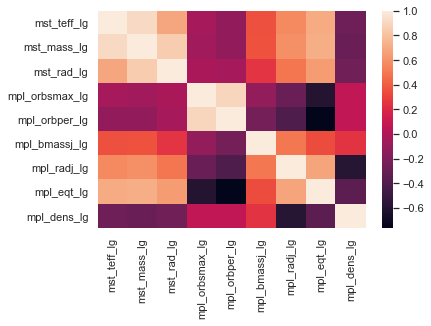

In [16]:
ax = sns.heatmap(exoplanet_core.corr())

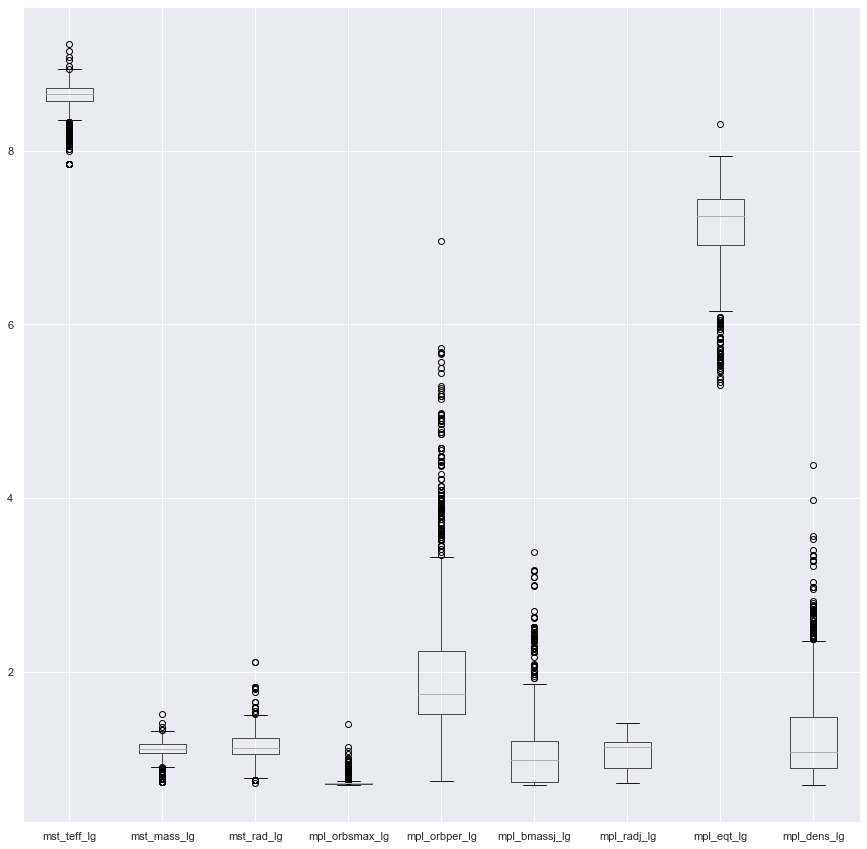

In [17]:
ax = exoplanet_core.boxplot(figsize=(15,15))


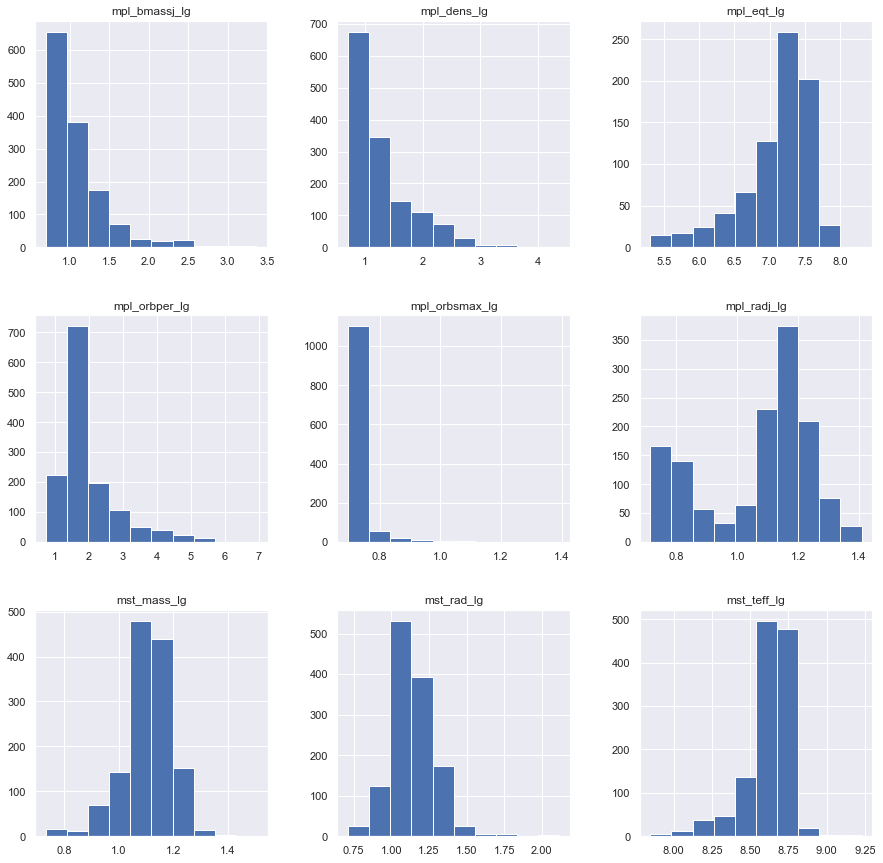

In [18]:
ax = exoplanet_core.hist(figsize=(15,15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 508 to 13983
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Star Temp. Eff.    676 non-null    float64
 1   Star Mass          676 non-null    float64
 2   Star Size          676 non-null    float64
 3   Planet Orb. Dist.  676 non-null    float64
 4   Planet period      676 non-null    float64
 5   Planet Mass        676 non-null    float64
 6   Planet Size        676 non-null    float64
 7   Planet Temp. Est.  676 non-null    float64
 8   Planet Density     676 non-null    float64
dtypes: float64(9)
memory usage: 52.8 KB


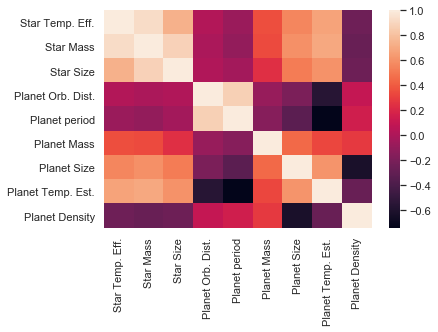

In [19]:
core_columns = ['mst_teff_lg','mst_mass_lg','mst_rad_lg','mpl_orbper_lg','mpl_orbsmax_lg','mpl_bmassj_lg',
                'mpl_radj_lg','mpl_dens_lg','mpl_eqt_lg']
# TODO Log in the column name
core_descriptive = ['Star Temp. Eff.', 'Star Mass','Star Size','Planet period','Planet Orb. Dist.', 'Planet Mass',
                   'Planet Size','Planet Density','Planet Temp. Est.']

core_des_col = dict(zip(core_columns,core_descriptive))


all_values = exoplanet_core.dropna()
all_values = all_values.rename(columns=core_des_col)
all_values.info()
ax = sns.heatmap(all_values.corr())


In [20]:
# Save the curated data to a dataframe for clustering attempts
all_values.corr()

,Star Temp. Eff.,Star Mass,Star Size,Planet Orb. Dist.,Planet period,Planet Mass,Planet Size,Planet Temp. Est.,Planet Density
Star Temp. Eff.,1.00,9.30e-01,0.74,2.33e-02,-0.08,0.36,0.56,0.67,-0.25
Star Mass,0.93,1.00e+00,0.88,-8.01e-03,-0.10,0.34,0.60,0.69,-0.28
Star Size,0.74,8.77e-01,1.00,1.46e-02,-0.04,0.24,0.52,0.61,-0.26
Planet Orb. Dist.,0.02,-8.01e-03,0.01,1.00e+00,0.87,-0.09,-0.20,-0.56,0.09
Planet period,-0.08,-1.00e-01,-0.04,8.71e-01,1.00,-0.16,-0.33,-0.75,0.15
Planet Mass,0.36,3.45e-01,0.24,-9.02e-02,-0.16,1.00,0.45,0.33,0.28
Planet Size,0.56,6.01e-01,0.52,-1.97e-01,-0.33,0.45,1.00,0.61,-0.63
Planet Temp. Est.,0.67,6.94e-01,0.61,-5.61e-01,-0.75,0.33,0.61,1.00,-0.28
Planet Density,-0.25,-2.81e-01,-0.26,9.49e-02,0.15,0.28,-0.63,-0.28,1.00


In [22]:
all_values.describe()

,Star Temp. Eff.,Star Mass,Star Size,Planet Orb. Dist.,Planet period,Planet Mass,Planet Size,Planet Temp. Est.,Planet Density
count,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00
mean,8.63,1.12,1.16,0.73,1.89,1.12,1.11,7.15,1.23
std,0.16,0.09,0.14,0.04,0.72,0.41,0.16,0.45,0.50
min,7.85,0.73,0.75,0.70,0.82,0.69,0.72,5.30,0.71
25%,8.58,1.07,1.06,0.71,1.50,0.83,1.07,6.98,0.88
50%,8.66,1.12,1.14,0.72,1.72,1.03,1.15,7.27,1.06
75%,8.72,1.18,1.26,0.72,1.97,1.26,1.21,7.45,1.40
max,9.23,1.51,2.12,1.39,6.96,3.18,1.41,8.31,3.56


In [23]:
all_values.skew()

Star Temp. Eff.     -1.82
Star Mass           -0.83
Star Size            0.51
Planet Orb. Dist.    8.05
Planet period        2.52
Planet Mass          1.81
Planet Size         -0.93
Planet Temp. Est.   -1.41
Planet Density       1.64
dtype: float64

In [21]:
all_values.to_pickle('exoplanet_cluster_input')